In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest, ttest_ind, kruskal
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Extracted_Features.csv')


features = ['mean_fixations_small', 'mean_saccades_small', 'mean_diametro_small',
            'min_fixations_small', 'min_saccades_small', 'min_diametro_small',
            'max_fixations_small', 'max_saccades_small', 'max_diametro_small',
            'std_fixations_small', 'std_saccades_small', 'std_diametro_small',
            'num_diff_nonzero_fixations_small', 'num_diff_nonzero_saccades_small',
            'mean_fixations_medium', 'mean_saccades_medium', 'mean_diametro_medium',
            'min_fixations_medium', 'min_saccades_medium', 'min_diametro_medium',
            'max_fixations_medium', 'max_saccades_medium', 'max_diametro_medium',
            'std_fixations_medium', 'std_saccades_medium', 'std_diametro_medium',
            'num_diff_nonzero_fixations_medium', 'num_diff_nonzero_saccades_medium',
            'mean_fixations_full', 'mean_saccades_full', 'mean_diametro_full',
            'min_fixations_full', 'min_saccades_full', 'min_diametro_full',
            'max_fixations_full', 'max_saccades_full', 'max_diametro_full',
            'std_fixations_full', 'std_saccades_full', 'std_diametro_full',
            'num_diff_nonzero_fixations_full', 'num_diff_nonzero_saccades_full', 'Binary']

data = df[features]

df.head()

,ID,PAINTING,mean_fixations_small,mean_saccades_small,mean_diametro_small,min_fixations_small,min_saccades_small,min_diametro_small,max_fixations_small,max_saccades_small,...,max_fixations_full,max_saccades_full,max_diametro_full,std_fixations_full,std_saccades_full,std_diametro_full,num_diff_nonzero_fixations_full,num_diff_nonzero_saccades_full,voto,Binary
0,1,1,533.025280,160.423178,40.676603,236.200000,233.0625,39.534199,1303.1250,414.0625,...,2364,621,56.098621,651.847840,161.042347,13.344737,48,35,25,0
1,1,2,959.141261,118.256765,41.718083,543.625000,224.3750,37.589233,1859.5000,399.9375,...,2630,565,80.965363,829.541125,150.093936,12.588451,40,28,33,1
2,1,4,618.470264,157.264000,38.525371,257.750000,232.3125,33.263347,1465.6250,430.7500,...,2211,653,55.277233,685.965108,171.631852,14.020381,51,37,37,1
3,1,6,388.826547,172.173720,38.225977,210.250000,233.5000,33.678094,1061.0625,413.2500,...,1686,637,78.819977,481.533646,177.598579,15.688681,52,38,18,0
4,1,7,416.682170,191.483547,37.850256,193.333333,235.0000,34.204060,1107.5625,523.5625,...,1824,1106,76.008530,534.620834,216.905087,13.772832,53,33,24,0


In [4]:
group1 = df[df['voto'] < 25]
group2 = df[df['voto'] >= 25]

results = pd.DataFrame(columns=['Variable', 'Test', 'Statistic', 'P-Value'])

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col == 'voto':
        continue
    statistic, p_value = kstest(df[col], 'norm')

    if p_value > 0.05:
        test_used = 'T-test'
        stat, p = ttest_ind(group1[col].dropna(), group2[col].dropna())
    else:
        test_used = 'Kruskal-Wallis'
        stat, p = kruskal(group1[col].dropna(), group2[col].dropna())
    
    temp_df = pd.DataFrame({'Variable': [col], 'Test': [test_used], 'Statistic': [stat], 'P-Value': [p]})
    
    results = pd.concat([results, temp_df], ignore_index=True)

In [5]:
results = results.drop(df.index[:2])
results = results.sort_values(by='P-Value', ascending=True)

results.head()

,Variable,Test,Statistic,P-Value
44,Binary,Kruskal-Wallis,3055.245954,0.000000
20,min_saccades_medium,Kruskal-Wallis,21.724234,0.000003
6,min_saccades_small,Kruskal-Wallis,21.114001,0.000004
34,min_saccades_full,Kruskal-Wallis,17.209955,0.000033
29,num_diff_nonzero_saccades_medium,Kruskal-Wallis,12.506977,0.000405


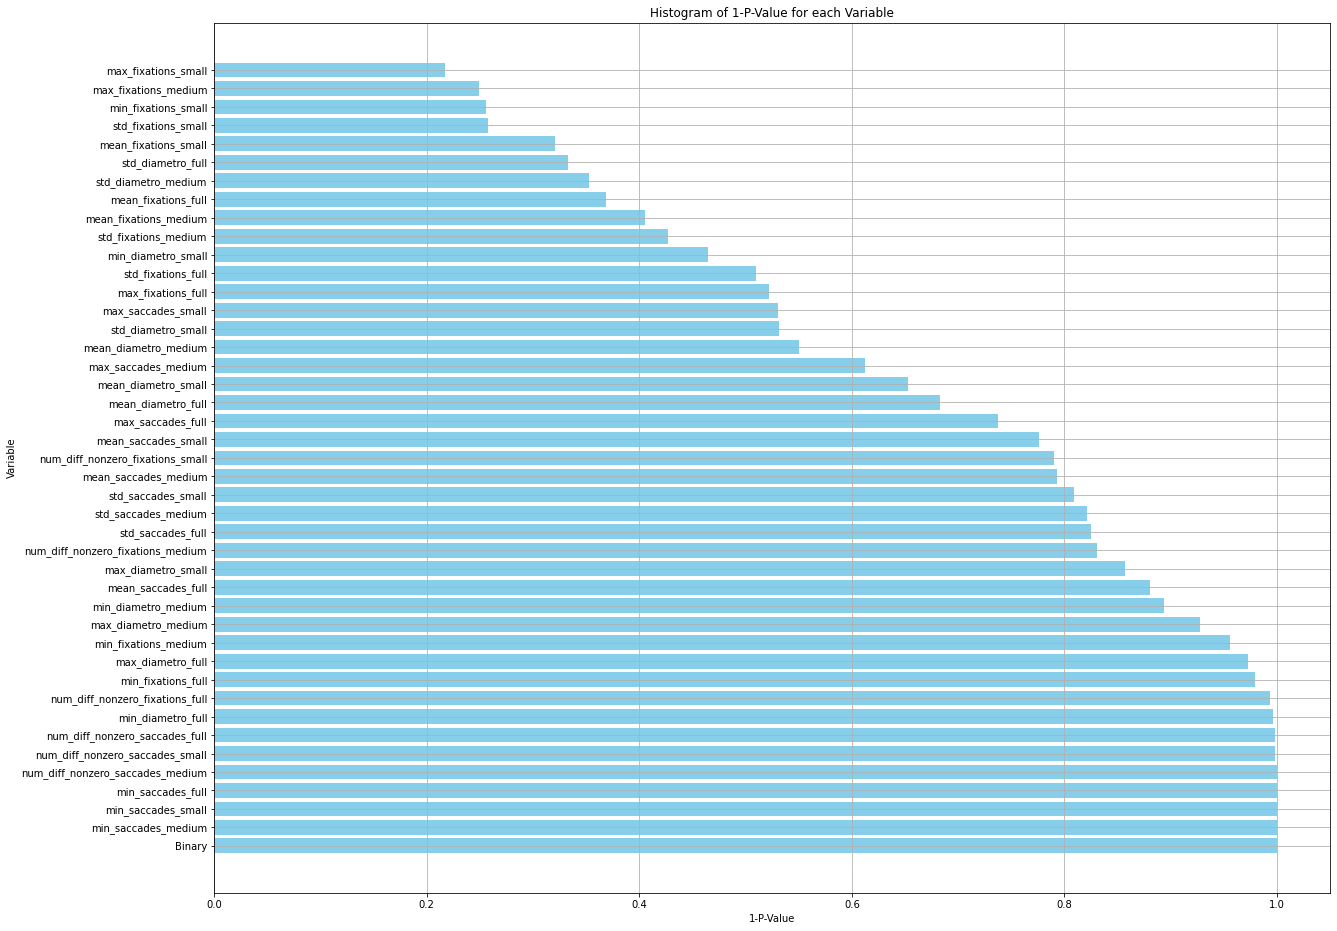

In [6]:
results['1-P-Value'] = 1 - results['P-Value']

plt.figure(figsize=(20, 16))
plt.barh(results['Variable'], results['1-P-Value'], color='skyblue')
plt.xlabel('1-P-Value')
plt.ylabel('Variable')
plt.title('Histogram of 1-P-Value for each Variable')
plt.grid(True)
plt.show()

In [7]:
top_15_features = results.head(27)

# Conversione della colonna 'Variable' in una lista
Top15Features = top_15_features['Variable'].tolist()

# Stampa della lista
Top15Features.remove('Binary')
Top15Features


['min_saccades_medium',
 'min_saccades_small',
 'min_saccades_full',
 'num_diff_nonzero_saccades_medium',
 'num_diff_nonzero_saccades_small',
 'num_diff_nonzero_saccades_full',
 'min_diametro_full',
 'num_diff_nonzero_fixations_full',
 'min_fixations_full',
 'max_diametro_full',
 'min_fixations_medium',
 'max_diametro_medium',
 'min_diametro_medium',
 'mean_saccades_full',
 'max_diametro_small',
 'num_diff_nonzero_fixations_medium',
 'std_saccades_full',
 'std_saccades_medium',
 'std_saccades_small',
 'mean_saccades_medium',
 'num_diff_nonzero_fixations_small',
 'mean_saccades_small',
 'max_saccades_full',
 'mean_diametro_full',
 'mean_diametro_small',
 'max_saccades_medium']

In [8]:
df['voto_binario'] = (df['voto'] > 25).astype(int)
df = df.dropna()

X = df[Top15Features]
y = df['voto_binario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



# Normalizzazione delle features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisione del dataset in train e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Addestramento del classificatore SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = svm_model.predict(X_test)

# Calcolo delle metriche di performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5555555555555556
Confusion Matrix:
 [[ 55 258]
 [ 46 325]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.18      0.27       313
           1       0.56      0.88      0.68       371

    accuracy                           0.56       684
   macro avg       0.55      0.53      0.47       684
weighted avg       0.55      0.56      0.49       684

Accuracy: 0.5394736842105263
Confusion Matrix:
 [[ 13 300]
 [ 15 356]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.04      0.08       313
           1       0.54      0.96      0.69       371

    accuracy                           0.54       684
   macro avg       0.50      0.50      0.38       684
weighted avg       0.51      0.54      0.41       684



In [9]:
intercept = model.intercept_[0]

# Ottenere i coefficienti (b_1, b_2, ..., b_n)
coefficients = model.coef_[0]

# Creare l'equazione in formato stringa
equation_terms = [f"{coeff:.4f}*x{idx+1}" for idx, coeff in enumerate(coefficients)]
equation = f"log(p/(1-p)) = {intercept:.4f} + " + " + ".join(equation_terms)

# Stampa dell'equazione
print("Equazione del modello di regressione logistica:")
print(equation)

Equazione del modello di regressione logistica:
log(p/(1-p)) = -0.0056 + 0.0029*x1 + -0.0008*x2 + 0.0021*x3 + -0.0241*x4 + 0.0309*x5 + 0.0074*x6 + 0.0188*x7 + -0.0218*x8 + -0.0002*x9 + 0.0000*x10 + -0.0001*x11 + 0.0001*x12 + -0.0091*x13 + 0.0068*x14 + -0.0028*x15 + 0.0593*x16 + -0.0012*x17 + 0.0007*x18 + -0.0034*x19 + -0.0031*x20 + 0.0061*x21 + -0.0037*x22 + 0.0002*x23 + -0.0184*x24 + 0.0165*x25 + 0.0007*x26


Da qui in avanti farò la stessa identica cosa ma per il range 0-15 e 35-50

In [10]:
group1 = df[df['voto'] < 15]
group2 = df[df['voto'] > 35]

resultss = pd.DataFrame(columns=['Variable', 'Test', 'Statistic', 'P-Value'])

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col == 'voto':
        continue
    statistic, p_value = kstest(df[col], 'norm')

    if p_value > 0.05:
        test_used = 'T-test'
        stat, p = ttest_ind(group1[col].dropna(), group2[col].dropna())
    else:
        test_used = 'Kruskal-Wallis'
        stat, p = kruskal(group1[col].dropna(), group2[col].dropna())
    
    temp_df = pd.DataFrame({'Variable': [col], 'Test': [test_used], 'Statistic': [stat], 'P-Value': [p]})
    
    resultss = pd.concat([resultss, temp_df], ignore_index=True)

resultss.head()

,Variable,Test,Statistic,P-Value
0,ID,Kruskal-Wallis,0.806705,3.690962e-01
1,PAINTING,Kruskal-Wallis,34.872274,3.520589e-09
2,mean_fixations_small,Kruskal-Wallis,7.622120,5.765668e-03
3,mean_saccades_small,Kruskal-Wallis,7.916853,4.897638e-03
4,mean_diametro_small,Kruskal-Wallis,0.689110,4.064673e-01


In [11]:
resultss = resultss.drop(resultss.index[:2])
resultss = resultss.sort_values(by='P-Value', ascending=True)

resultss.head()

,Variable,Test,Statistic,P-Value
45,voto_binario,Kruskal-Wallis,1661.000000,0.000000e+00
44,Binary,Kruskal-Wallis,1661.000000,0.000000e+00
34,min_saccades_full,Kruskal-Wallis,23.966155,9.804412e-07
20,min_saccades_medium,Kruskal-Wallis,21.606788,3.346653e-06
6,min_saccades_small,Kruskal-Wallis,19.821641,8.501470e-06


In [12]:
resultss = resultss.drop(resultss.index[0])

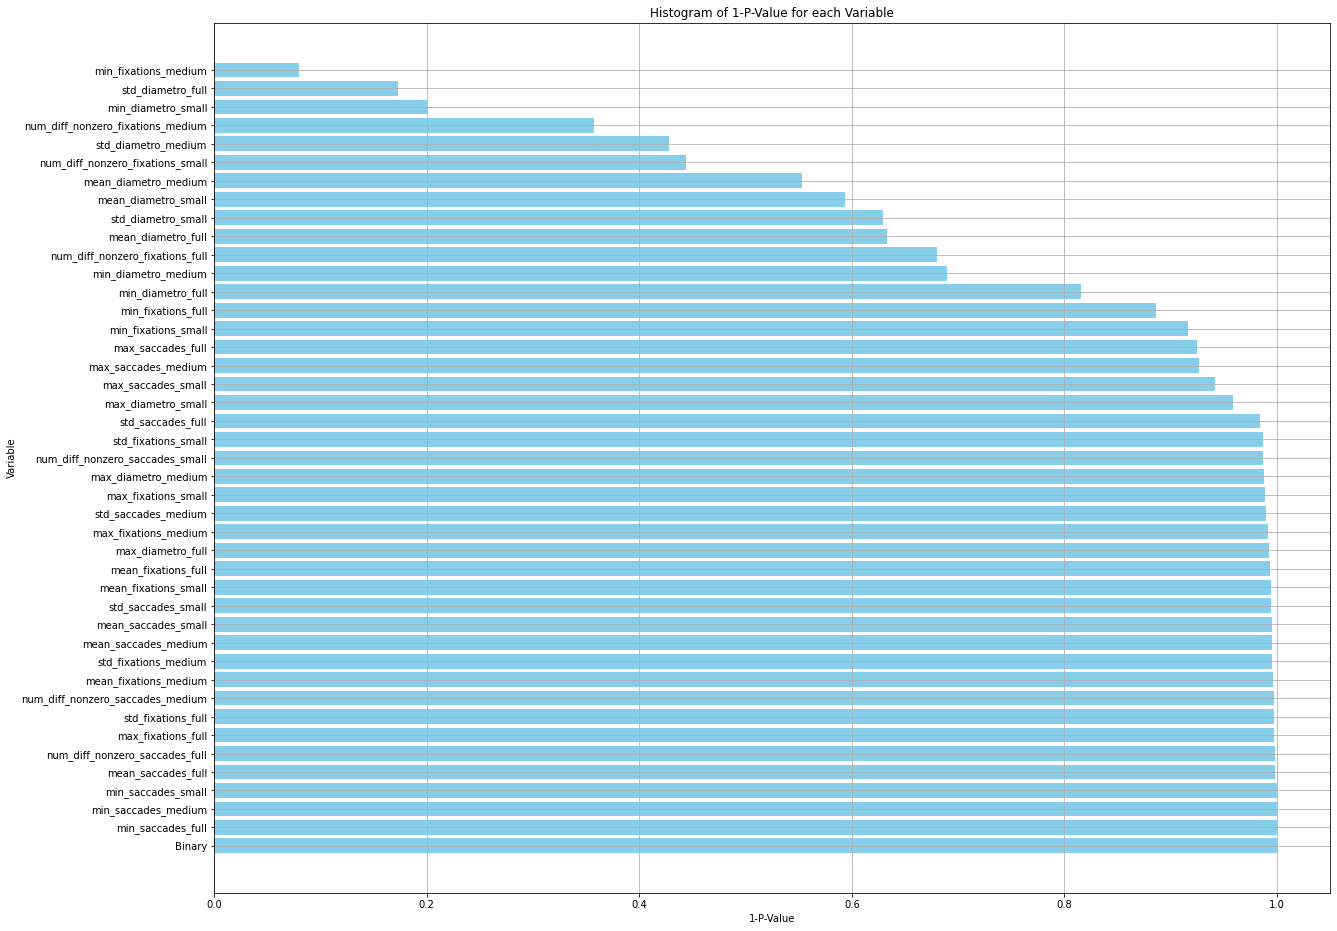

In [13]:
resultss['1-P-Value'] = 1 - resultss['P-Value']

plt.figure(figsize=(20, 16))
plt.barh(resultss['Variable'], resultss['1-P-Value'], color='skyblue')
plt.xlabel('1-P-Value')
plt.ylabel('Variable')
plt.title('Histogram of 1-P-Value for each Variable')
plt.grid(True)
plt.show()

In [14]:
df['voto_binario_2'] = df['voto'].apply(lambda x: 0 if x < 15 else (1 if x > 35 else 2))
dft = df[df['voto_binario_2'] != 2]
dft.head()

,ID,PAINTING,mean_fixations_small,mean_saccades_small,mean_diametro_small,min_fixations_small,min_saccades_small,min_diametro_small,max_fixations_small,max_saccades_small,...,max_diametro_full,std_fixations_full,std_saccades_full,std_diametro_full,num_diff_nonzero_fixations_full,num_diff_nonzero_saccades_full,voto,Binary,voto_binario,voto_binario_2
2,1,4,618.470264,157.264000,38.525371,257.7500,232.3125,33.263347,1465.6250,430.7500,...,55.277233,685.965108,171.631852,14.020381,51,37,37,1,1,1
5,1,9,817.234557,173.284911,38.463996,299.0625,232.3750,35.139955,1872.9375,489.3125,...,72.763443,963.058236,211.717024,13.207146,45,40,44,1,1,1
9,1,14,613.497545,178.172928,41.100710,261.1250,231.5000,27.660910,1547.0625,513.5000,...,1098.713379,722.379342,190.494802,44.817042,44,36,14,0,0,0
10,1,15,1226.641426,148.452119,22.876096,433.1250,267.2500,26.339527,2359.3125,456.4375,...,157.176102,1923.971350,191.475871,20.550892,40,36,40,1,1,1
13,1,20,2703.288413,149.805925,15.217441,2638.0000,257.0000,28.255108,4748.5000,475.1250,...,64.901466,4569.621335,273.187378,19.475313,30,28,36,1,1,1


In [15]:
top_15_features_2 = resultss.head(15)

# Conversione della colonna 'Variable' in una lista
Top15Features_2 = top_15_features_2['Variable'].tolist()

# Stampa della lista
Top15Features_2

['Binary',
 'min_saccades_full',
 'min_saccades_medium',
 'min_saccades_small',
 'mean_saccades_full',
 'num_diff_nonzero_saccades_full',
 'max_fixations_full',
 'std_fixations_full',
 'num_diff_nonzero_saccades_medium',
 'mean_fixations_medium',
 'std_fixations_medium',
 'mean_saccades_medium',
 'mean_saccades_small',
 'std_saccades_small',
 'mean_fixations_small']

In [16]:
dft = dft.dropna()

X = dft[Top15Features_2]
y = dft['voto_binario_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



# Normalizzazione delle features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisione del dataset in train e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Addestramento del classificatore SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = svm_model.predict(X_test)

# Calcolo delle metriche di performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[142   0]
 [  0 191]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       191

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

Accuracy: 0.996996996996997
Confusion Matrix:
 [[142   0]
 [  1 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       1.00      0.99      1.00       191

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



In [17]:
SameFeatures = []
for f in Top15Features:
    if f in Top15Features_2:
        SameFeatures.append(f)

SameFeatures

['min_saccades_medium',
 'min_saccades_small',
 'min_saccades_full',
 'num_diff_nonzero_saccades_medium',
 'num_diff_nonzero_saccades_full',
 'mean_saccades_full',
 'std_saccades_small',
 'mean_saccades_medium',
 'mean_saccades_small']

In [18]:
X = df[SameFeatures]
y = df['voto_binario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



# Normalizzazione delle features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisione del dataset in train e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Addestramento del classificatore SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = svm_model.predict(X_test)

# Calcolo delle metriche di performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)







Accuracy: 0.5497076023391813
Confusion Matrix:
 [[ 15 298]
 [ 10 361]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.05      0.09       313
           1       0.55      0.97      0.70       371

    accuracy                           0.55       684
   macro avg       0.57      0.51      0.39       684
weighted avg       0.57      0.55      0.42       684

Accuracy: 0.5497076023391813
Confusion Matrix:
 [[  7 306]
 [  2 369]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.02      0.04       313
           1       0.55      0.99      0.71       371

    accuracy                           0.55       684
   macro avg       0.66      0.51      0.37       684
weighted avg       0.65      0.55      0.40       684



In [19]:
vote_column = data['voto']

# Prepara una lista di colonne escludendo 'voto'
other_columns = [col for col in data.columns if col != 'voto']

# Numero di scatter plots da creare
n_plots = len(other_columns)

# Crea un subplot per ogni scatter plot
fig, axes = plt.subplots(nrows=n_plots, figsize=(5, 5 * n_plots))

# Controllo se c'è solo una colonna, axes non sarà un array
if n_plots == 1:
    axes = [axes]

# Genera scatter plots
for ax, column in zip(axes, other_columns):
    ax.scatter(data[column], vote_column, alpha=0.5)
    ax.set_title(f'Scatter Plot: {column} vs Voto')
    ax.set_xlabel(column)
    ax.set_ylabel('Voto')

plt.tight_layout()
plt.show()

KeyError: 'voto'

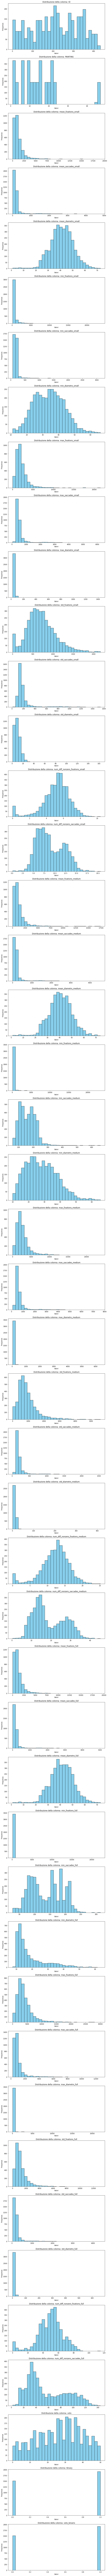

In [ ]:
# Numero di colonne
n_cols = len(data.columns)

# Crea un subplot per ogni istogramma
fig, axes = plt.subplots(nrows=n_cols, figsize=(10, 5 * n_cols))

# Controllo se c'è solo una colonna, axes non sarà un array
if n_cols == 1:
    axes = [axes]

# Genera istogrammi
for ax, column in zip(axes, data.columns):
    ax.hist(data[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribuzione della colonna: {column}')
    ax.set_xlabel('Valori')
    ax.set_ylabel('Frequenza')

plt.tight_layout()
plt.show()

In [ ]:
# Nuovo DataFrame filtrato
filtered_data = pd.DataFrame()

for column in data.columns:
    # Calcola il 5° e il 95° percentile per ogni colonna
    p10 = data[column].quantile(0.05)
    p90 = data[column].quantile(0.95)
    
    # Filtra i dati per mantenere solo quelli tra il 5° e il 95° percentile
    if filtered_data.empty:
        filtered_data = data[(data[column] >= p10) & (data[column] <= p90)]
    else:
        filtered_data = filtered_data[(filtered_data[column] >= p10) & (filtered_data[column] <= p90)]

filtered_data

,ID,PAINTING,mean_fixations_small,mean_saccades_small,mean_diametro_small,min_fixations_small,min_saccades_small,min_diametro_small,max_fixations_small,max_saccades_small,...,max_saccades_full,max_diametro_full,std_fixations_full,std_saccades_full,std_diametro_full,num_diff_nonzero_fixations_full,num_diff_nonzero_saccades_full,voto,Binary,voto_binario
164,26,1,626.804478,145.830576,43.452148,150.750000,176.875000,35.979411,1328.812500,396.812500,...,508,52.791779,852.306381,146.453769,14.494654,55,44,26,1,1
165,26,2,551.545862,136.267622,44.435863,188.266667,185.687500,47.625166,1302.187500,425.312500,...,791,55.138586,698.753078,158.691858,17.734975,53,37,8,0,0
166,26,4,523.904569,143.158591,43.995170,185.117647,173.647059,36.983733,1318.705882,439.470588,...,856,52.431135,613.385001,167.757890,13.327945,68,39,22,0,0
167,26,6,558.192587,143.018009,39.394102,137.625000,175.437500,32.265077,1280.937500,358.437500,...,451,49.788782,699.934203,132.631861,14.489209,62,41,27,1,1
168,26,7,1161.304277,102.289965,29.207854,352.812500,195.437500,25.171850,2159.937500,371.062500,...,565,51.897765,1503.238321,137.623437,18.451478,51,40,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,389,16,945.421865,181.629528,41.323807,246.687500,179.125000,33.588324,1876.562500,538.500000,...,1566,87.340553,874.808842,296.822883,12.719692,56,40,8,0,0
3260,389,18,892.273362,212.160784,38.795774,364.062500,185.750000,33.919435,1696.062500,584.000000,...,1509,65.549759,1188.565707,293.789989,14.485398,48,44,11,0,0
3262,389,21,944.688897,163.046855,40.085072,207.687500,176.062500,26.858928,1940.625000,472.687500,...,751,78.216476,1015.840575,188.690545,14.374802,50,45,38,1,1
3265,389,45,750.611840,190.677776,36.879136,199.000000,195.875000,32.018771,1495.812500,522.062500,...,1324,93.648216,1141.822376,307.452758,13.212144,55,38,31,1,1


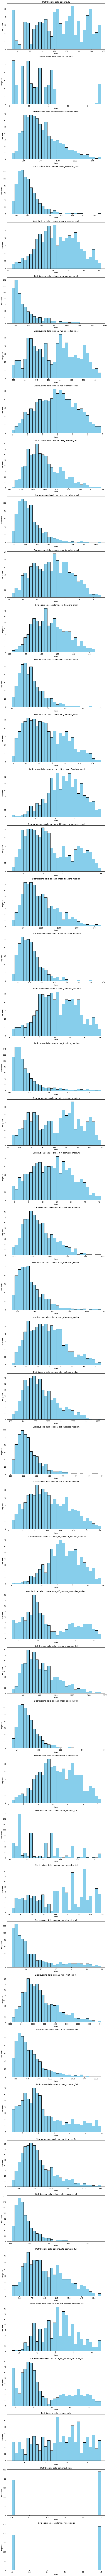

In [ ]:
# Numero di colonne
n_cols = len(filtered_data.columns)

# Crea un subplot per ogni istogramma
fig, axes = plt.subplots(nrows=n_cols, figsize=(10, 5 * n_cols))

# Controllo se c'è solo una colonna, axes non sarà un array
if n_cols == 1:
    axes = [axes]

# Genera istogrammi
for ax, column in zip(axes, filtered_data.columns):
    ax.hist(filtered_data[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribuzione della colonna: {column}')
    ax.set_xlabel('Valori')
    ax.set_ylabel('Frequenza')

plt.tight_layout()
plt.show()

In [ ]:
filtered_data.to_csv('Extracted_Features_NO-OUTLIERS.csv', index=False)

In [ ]:
data

,ID,PAINTING,mean_fixations_small,mean_saccades_small,mean_diametro_small,min_fixations_small,min_saccades_small,min_diametro_small,max_fixations_small,max_saccades_small,...,max_saccades_full,max_diametro_full,std_fixations_full,std_saccades_full,std_diametro_full,num_diff_nonzero_fixations_full,num_diff_nonzero_saccades_full,voto,Binary,voto_binario
0,1,1,533.025280,160.423178,40.676603,236.200000,233.062500,39.534199,1303.125000,414.062500,...,621,56.098621,651.847840,161.042347,13.344737,48,35,25,0,0
1,1,2,959.141261,118.256765,41.718083,543.625000,224.375000,37.589233,1859.500000,399.937500,...,565,80.965363,829.541125,150.093936,12.588451,40,28,33,1,1
2,1,4,618.470264,157.264000,38.525371,257.750000,232.312500,33.263347,1465.625000,430.750000,...,653,55.277233,685.965108,171.631852,14.020381,51,37,37,1,1
3,1,6,388.826547,172.173720,38.225977,210.250000,233.500000,33.678094,1061.062500,413.250000,...,637,78.819977,481.533646,177.598579,15.688681,52,38,18,0,0
4,1,7,416.682170,191.483547,37.850256,193.333333,235.000000,34.204060,1107.562500,523.562500,...,1106,76.008530,534.620834,216.905087,13.772832,53,33,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,433,21,413.759201,272.099505,43.226224,200.000000,88.125000,14.555465,1131.875000,746.437500,...,1785,94.056313,594.567670,371.586232,19.143375,59,126,4,0,0
3434,433,22,713.084441,198.303046,38.480120,196.687500,103.125000,22.076219,1580.875000,638.062500,...,986,64.859375,799.131948,242.222748,10.201133,51,100,39,1,1
3435,433,23,532.374389,233.595994,34.061647,193.375000,96.437500,21.677002,1361.750000,615.187500,...,1197,72.476982,732.873481,269.992910,10.125300,70,118,2,0,0
3436,433,45,562.554638,220.089855,37.764686,128.823529,100.588235,22.597800,1371.058824,596.352941,...,935,84.657867,951.873395,235.670440,16.408542,78,123,47,1,1


In [ ]:
filtered_data

,ID,PAINTING,mean_fixations_small,mean_saccades_small,mean_diametro_small,min_fixations_small,min_saccades_small,min_diametro_small,max_fixations_small,max_saccades_small,...,max_saccades_full,max_diametro_full,std_fixations_full,std_saccades_full,std_diametro_full,num_diff_nonzero_fixations_full,num_diff_nonzero_saccades_full,voto,Binary,voto_binario
164,26,1,626.804478,145.830576,43.452148,150.750000,176.875000,35.979411,1328.812500,396.812500,...,508,52.791779,852.306381,146.453769,14.494654,55,44,26,1,1
165,26,2,551.545862,136.267622,44.435863,188.266667,185.687500,47.625166,1302.187500,425.312500,...,791,55.138586,698.753078,158.691858,17.734975,53,37,8,0,0
166,26,4,523.904569,143.158591,43.995170,185.117647,173.647059,36.983733,1318.705882,439.470588,...,856,52.431135,613.385001,167.757890,13.327945,68,39,22,0,0
167,26,6,558.192587,143.018009,39.394102,137.625000,175.437500,32.265077,1280.937500,358.437500,...,451,49.788782,699.934203,132.631861,14.489209,62,41,27,1,1
168,26,7,1161.304277,102.289965,29.207854,352.812500,195.437500,25.171850,2159.937500,371.062500,...,565,51.897765,1503.238321,137.623437,18.451478,51,40,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,389,16,945.421865,181.629528,41.323807,246.687500,179.125000,33.588324,1876.562500,538.500000,...,1566,87.340553,874.808842,296.822883,12.719692,56,40,8,0,0
3260,389,18,892.273362,212.160784,38.795774,364.062500,185.750000,33.919435,1696.062500,584.000000,...,1509,65.549759,1188.565707,293.789989,14.485398,48,44,11,0,0
3262,389,21,944.688897,163.046855,40.085072,207.687500,176.062500,26.858928,1940.625000,472.687500,...,751,78.216476,1015.840575,188.690545,14.374802,50,45,38,1,1
3265,389,45,750.611840,190.677776,36.879136,199.000000,195.875000,32.018771,1495.812500,522.062500,...,1324,93.648216,1141.822376,307.452758,13.212144,55,38,31,1,1


PCA su Data e FilteredData

Varianza spiegata da ciascuna delle componenti principali:
Componente 1: 0.3058 - 30.58%
Componente 2: 0.2175 - 21.75%
Componente 3: 0.1247 - 12.47%
Componente 4: 0.1082 - 10.82%


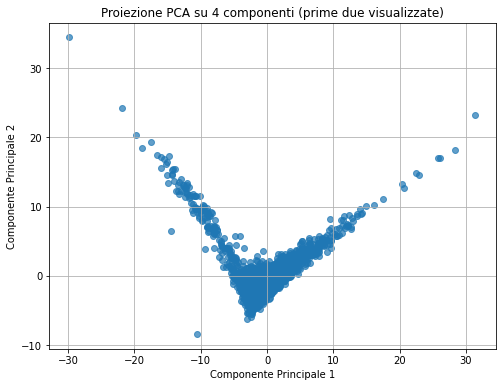

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data[features]
X = X.dropna()

# Normalizzazione dei dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA con 4 componenti
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Varianza spiegata
explained_variance = pca.explained_variance_ratio_
print("Varianza spiegata da ciascuna delle componenti principali:")
for i, variance in enumerate(explained_variance, 1):
    print(f"Componente {i}: {variance:.4f} - {variance * 100:.2f}%")

# Visualizzazione delle componenti principali
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.title('Proiezione PCA su 4 componenti (prime due visualizzate)')
plt.grid(True)
plt.show()

Varianza spiegata da ciascuna delle componenti principali:
Componente 1: 0.3059 - 30.59%
Componente 2: 0.1590 - 15.90%
Componente 3: 0.1516 - 15.16%
Componente 4: 0.1116 - 11.16%


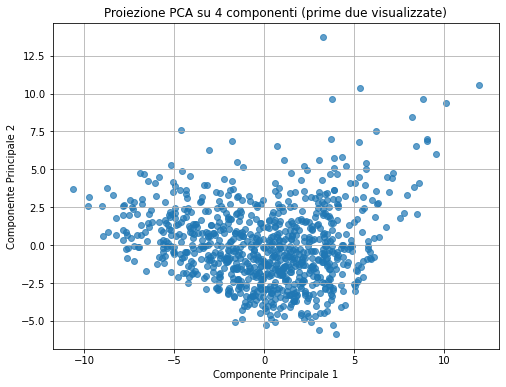

In [ ]:


X = filtered_data[features]
X = X.dropna()

# Normalizzazione dei dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA con 4 componenti
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Varianza spiegata
explained_variance = pca.explained_variance_ratio_
print("Varianza spiegata da ciascuna delle componenti principali:")
for i, variance in enumerate(explained_variance, 1):
    print(f"Componente {i}: {variance:.4f} - {variance * 100:.2f}%")

# Visualizzazione delle componenti principali
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.title('Proiezione PCA su 4 componenti (prime due visualizzate)')
plt.grid(True)
plt.show()